## Summary

<p>
The goal of this project is to predict "miles per gallon" (mpg) with (multiple) linear regression models and explore "overfitting" on the
training data. The machine learning work flow of splitting the data into training and test data, instantiating the linear regression model, fitting the model to the data, and do an evaluation with mean squared error and variance. The data is cleaned mostly with pandas.
</p>

<p>
The dataset used is the "Auto MPG Data Set" and is hosted by the University of California Irvine on their
<a href="https://archive.ics.uci.edu/ml/datasets/Auto+MPG"> machine learning repository </a>.
</p>

## Import packages

In [775]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold


In [776]:
pd.__version__

'0.20.1'

## Import data

In [777]:
column_names =["mpg",
"cylinders",
"displacement",
"horsepower",
"weight",
"acceleration",
"model year",
"origin",
"car name"]

print(column_names)

['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


In [778]:
cars=pd.read_table("auto-mpg.data", header=None, delim_whitespace=True, names=column_names)

## Explore & clean the data

In [779]:
cars.shape

(398, 9)

In [780]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg             398 non-null float64
cylinders       398 non-null int64
displacement    398 non-null float64
horsepower      398 non-null object
weight          398 non-null float64
acceleration    398 non-null float64
model year      398 non-null int64
origin          398 non-null int64
car name        398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [781]:
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [782]:
for i in range(0, cars.shape[1]):
               print(cars.columns[i], ":" , type (cars.iloc[5,i]))

mpg : <class 'numpy.float64'>
cylinders : <class 'numpy.int64'>
displacement : <class 'numpy.float64'>
horsepower : <class 'str'>
weight : <class 'numpy.float64'>
acceleration : <class 'numpy.float64'>
model year : <class 'numpy.int64'>
origin : <class 'numpy.int64'>
car name : <class 'str'>


Car name is a string, but horsepower. The other columns are correctly numerical.

In [783]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [784]:
# cars['horsepower'] = cars['horsepower'].astype('float').copy()
# returns error because "?" cannot be converted into float
# Were are the observations with "?" ?

cars_non_standard_nan = cars[cars['horsepower'].str.match("\?")]
print(cars_non_standard_nan.shape)
cars_non_standard_nan



(6, 9)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [785]:
list(cars_non_standard_nan.index)

[32, 126, 330, 336, 354, 374]

In [786]:

# Impute or filter 6 values?
# 6 observations can be filtered out
# old shape: (398, 9)
cars =cars.drop(cars_non_standard_nan.index).copy()
cars.shape


(392, 9)

In [787]:
cars['horsepower'] = cars['horsepower'].astype('float').copy()
cars.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

Clean column names

In [788]:
cars.columns=cars.columns.str.replace(" ", "_")
cars.columns=cars.columns.str.strip()
print(cars.columns)

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')


Are there any null-values?

In [789]:
cars.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower      False
weight          False
acceleration    False
model_year      False
origin          False
car_name        False
dtype: bool

In [790]:
cars.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
car_name        0
dtype: int64

#### Explore the distributions

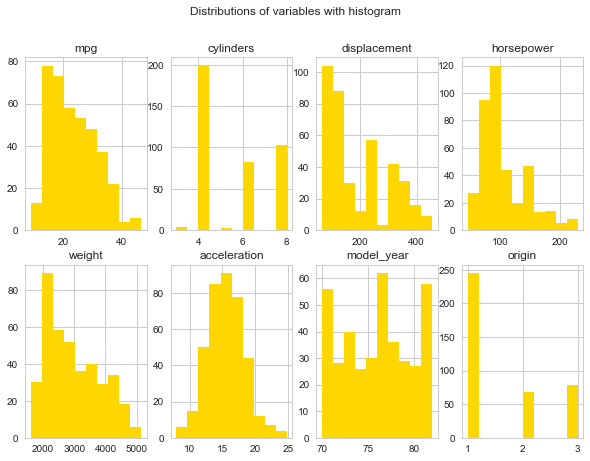

In [791]:
cars_names=list(cars.columns)


fig, axs = plt.subplots(2,4, figsize=(10,7))
axs = axs.ravel()
fig.suptitle('Distributions of variables with histogram')
for i in range(8):
    axs[i].hist(cars[cars_names[i]], color="gold")
    axs[i].set_title(cars_names[i])
plt.show()

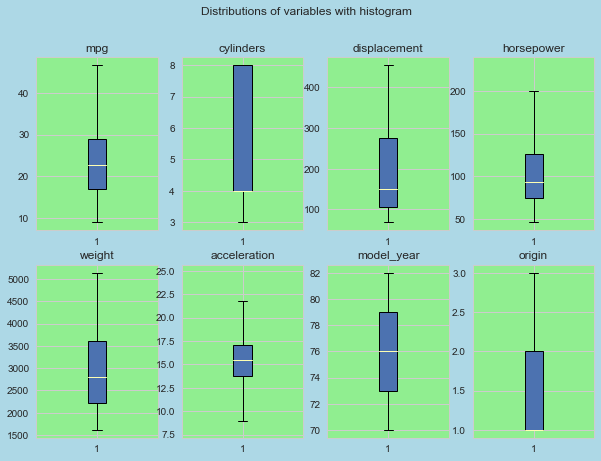

In [792]:

fig, axs = plt.subplots(2,4, figsize=(10,7), facecolor="lightblue")
axs = axs.ravel()
fig.suptitle('Distributions of variables with histogram')
for i in range(8):
    axs[i].boxplot(cars[cars_names[i]], showbox = True, patch_artist=True)
    axs[i].set_facecolor("lightgreen")
    axs[i].set_title(cars_names[i])
    
    
plt.show()

#### Aggregation

In [793]:
print(cars['origin'].unique())
print(cars['origin'].value_counts())

[1 3 2]
1    245
3     79
2     68
Name: origin, dtype: int64


In [794]:
cars.groupby('origin')[['mpg', 'cylinders', 'weight']].\
aggregate(["mean", "std", "max", "min", "median"]).transpose()

origin                      1            2            3
mpg       mean      20.033469    27.602941    30.450633
          std        6.440384     6.580182     6.090048
          max       39.000000    44.300000    46.600000
          min        9.000000    16.200000    18.000000
          median    18.500000    26.000000    31.600000
cylinders mean       6.277551     4.161765     4.101266
          std        1.655996     0.506975     0.590414
          max        8.000000     6.000000     6.000000
          min        4.000000     4.000000     3.000000
          median     6.000000     4.000000     4.000000
weight    mean    3372.489796  2433.470588  2221.227848
          std      795.346690   491.813867   320.497248
          max     5140.000000  3820.000000  2930.000000
          min     1800.000000  1825.000000  1613.000000
          median  3381.000000  2240.000000  2155.000000

#### Correlation

In [795]:
cars_corr_matrix=cars.corr()
correlation_origin_other = cars_corr_matrix.loc[:,'origin']
correlation_origin_other 

mpg             0.565209
cylinders      -0.568932
displacement   -0.614535
horsepower     -0.455171
weight         -0.585005
acceleration    0.212746
model_year      0.181528
origin          1.000000
Name: origin, dtype: float64

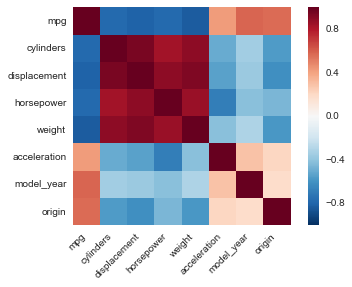

In [796]:
ax = sns.heatmap(
    cars_corr_matrix, 
    vmin=-1, vmax=1, center=0,
    # cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

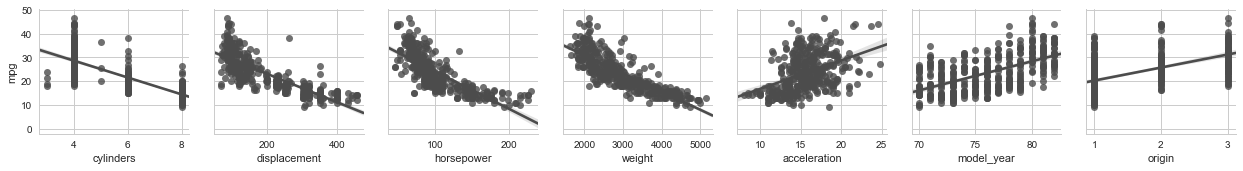

In [797]:
plt.style.use(['seaborn-whitegrid'])
g = sns.PairGrid(cars, y_vars=["mpg"], x_vars=['cylinders', 'displacement', 'horsepower', 'weight','acceleration', 'model_year', 'origin'])
g.map(sns.regplot, color=".3")

Some of these regression relationships make intuitively sense. As horsepower increases miles per gallon goes down. 
More fuel is needed for one mile or less miles can be driven with one gallon.

## Modeling: linear regression

#### First model: simple (univariate) linear regression models without train-test-split

In [798]:
def train_train_model(features):
    reg = LinearRegression()
    X = cars[features] # needs a list
    y = cars[['mpg']] # label or targe variable
    reg.fit(X,y)
    predictions = reg.predict(X)
    mse = mean_squared_error(y, predictions)
    variance = np.var(predictions)
    return(mse, variance)
    

In [799]:
mse_acceleration, variance_acceleration = simple_reg(['acceleration'])
print(mse_acceleration.round(2))
print(variance_acceleration.round(2))

49.87
10.89


In [800]:
mse_weight, variance_weight = simple_reg(['weight'])
print(mse_weight.round(2))
print(variance_weight.round(2))

18.68
42.09


In [801]:
mse_cylinders, variance_cylinders = simple_reg(['cylinders'])
print(mse_cylinders.round(2))
print(variance_cylinders.round(2))

24.02
36.74


In [802]:

mse_horsepower, variance_horsepower = simple_reg(['horsepower'])
print(mse_horsepower.round(2))
print(variance_horsepower.round(2))

23.94
36.82


In [803]:
names=["acceleration", "weight", "cylinders", "horsepower"]
features = [mse_acceleration, mse_weight, mse_cylinders, mse_horsepower]
all_mse_array = np.array([names, features])
print(all_mse_array)

all_mse_1 = pd.DataFrame(all_mse_array).transpose()
all_mse_1.columns = ["Feature" , "MSE"]
all_mse_1.sort_values(by="MSE")

[['acceleration' 'weight' 'cylinders' 'horsepower']
 ['49.8736273267' '18.6766165974' '24.0201795682' '23.9436629386']]


,Feature,MSE
1,weight,18.6766165974
3,horsepower,23.9436629386
2,cylinders,24.0201795682
0,acceleration,49.8736273267


The weight feature generates the lowest MSE. The relationship between weight and miles per gallon seems plausible.

Step-by-step extending the number of features used.

In [804]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
mpg             392 non-null float64
cylinders       392 non-null int64
displacement    392 non-null float64
horsepower      392 non-null float64
weight          392 non-null float64
acceleration    392 non-null float64
model_year      392 non-null int64
origin          392 non-null int64
car_name        392 non-null object
dtypes: float64(5), int64(3), object(1)
memory usage: 40.6+ KB


In [805]:
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_name'],
      dtype='object')

In [806]:
mse_2, variance_2 = train_train_model(['cylinders', 'displacement'])
mse_3, variance_3 = train_train_model(['cylinders', 'displacement', 'horsepower'])
mse_4, variance_4 = train_train_model(['cylinders', 'displacement', 'horsepower', 'weight'])
mse_5, variance_5 = train_train_model(['cylinders', 'displacement', 'horsepower', 'weight','acceleration'])
mse_6, variance_6 = train_train_model(['cylinders', 'displacement', 'horsepower', 'weight',\
                                                  'acceleration', 'model_year'])
mse_7, variance_7 = train_train_model(['cylinders', 'displacement', 'horsepower', 'weight', \
                                                  'acceleration', 'model_year', 'origin'])


In [807]:
step_mse = [mse_2, mse_3, mse_4, mse_5, mse_6, mse_7]
# print(step_mse)
# step_variance = [variance_2, variance_3, variance_4, variance_5, variance_6, variance_7]
# print(step_variance)
step_number_features = np.arange(2,8,1, dtype="int")
# print(step_number_features)
step_names = ["feature", "MSE", "variance"]

step_df = pd.DataFrame(np.array([step_number_features, step_mse, step_variance]).T, columns=step_names)
step_df['feature'] = step_df['feature'].astype('int64')


### bias-variance-tradeoff
Bias results from insufficient understanding of the relationship between predictor and response variables.
(Which features to use?)<br>
Variance is the variability of the predicted values.<br>
Often low bias (MSE) correspondends with high variance (var) and vice versa.

In [808]:
step_df.sort_values('MSE')

,feature,MSE,variance
5,7,10.847481,49.915257
4,6,11.590171,49.172567
3,5,17.761396,43.001342
2,4,17.763861,42.998878
1,3,20.252955,40.509784
0,2,21.282057,39.480681


By adding number of features the MSE decreases. The seven feature model has the lowest MSE with 10.85. The bias is low.<br>
The two feature model has the highest MSE. The bias is highest therefore.

In [809]:
step_df.sort_values('variance')

,feature,MSE,variance
0,2,21.282057,39.480681
1,3,20.252955,40.509784
2,4,17.763861,42.998878
3,5,17.761396,43.001342
4,6,11.590171,49.172567
5,7,10.847481,49.915257


The 2 feature model has the lowest variance with 39.48 and  the 7 feature model has the highest variance with 
49.91. This makes it an excellent example of the bias-variance-tradeoff. It makes it also not "solvable". 
<p>
The mean-squared-errors here are generated by using <b> training data</b>  only meaning the predictions are made on the same training data X, which was used to fit the model. These errors are <b> in-sample-errors</b> . At this point we do not know how the model performs on unseen <b> testing data </b> or what the <b> out-of-samples-errors</b>  are. If the in-sample-error is 
significant lower than the out-of-sample-error than the model performs good on the training data but bad on the testing data. This is called <b>"overfitting"</b> and should be avoided.
</p>

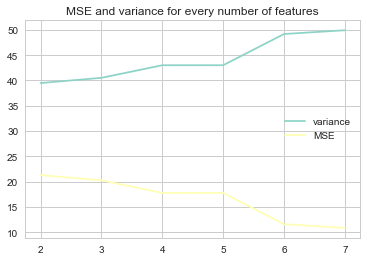

In [810]:

plt.plot(step_df['feature'], step_df['variance'])
plt.plot(step_df['feature'], step_df['MSE'])
plt.title("MSE and variance for every number of features")
plt.legend(loc="center right")
plt.style.use(['dark_background'])
plt.show()

There is not a optimum minium value for both.

#### Three feature linear regression model with K-Folds cross 

Is there overfitting?

In [811]:
cars_55 = cars.copy()

In [812]:
target_55 = cars_55[['mpg']]
features_55 = cars_55[['cylinders', 'displacement', 'horsepower']]
# print(features_55 )

In [813]:
kf = KFold(n_splits=10, random_state=3, shuffle=True)
kf.get_n_splits(cars_55)

10

In [814]:
print(kf)

KFold(n_splits=10, random_state=3, shuffle=True)


In [815]:
kf.split(features_55)

<generator object _BaseKFold.split at 0x000002EF12A5A990>

For every fold consisting of training folds (X_train, y_train) and testing folds (X_test, y_test) the mse and variance 
is determined. (There is a lot of algebra underlying this :-)

In [816]:
variance_values_55 = []
mse_values_55 = []


for train_index, test_index in kf.split(cars_55):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = features_55.iloc[train_index], features_55.iloc[test_index]
    y_train, y_test = target_55.iloc[train_index], target_55.iloc[test_index]
    reg_55 = LinearRegression()
    reg_55.fit(X_train, y_train)
    predictions_55 = reg_55.predict(X_test)
    mse_55 = mean_squared_error(y_test, predictions_55)
    variance_55 = np.var(predictions_55)
    
    variance_values_55.append(variance_55)
    mse_values_55.append(mse_55)
   
    

In [817]:
# variance of predictions for every fold
print(variance_values_55)

[37.0741214564692, 45.135713046327325, 41.328004612180102, 49.610357084758839, 32.992095322429904, 49.38911180290129, 34.489167579279261, 42.255454425543242, 30.16886202618447, 38.469992209995858]


In [818]:
# mse's for every fold
print(mse_values_55)

[17.76676555473918, 16.721096330114374, 20.110780112421693, 15.415416476066913, 19.294842066799411, 29.361970671780455, 23.616882419304311, 25.045222245002144, 15.872726502363729, 23.350519560237341]


In [819]:
avg_variance_55 = np.mean(variance_values_55)
avg_variance_55

40.091287956606948

#### Out-of-sample error

is the mean squared error on the test data (generated with K-fold cross validation).

In [820]:
avg_mse_55 = np.mean(mse_values_55)
avg_mse_55 

20.655622193882955

The average mse or out-of-sample-error of 20.6556 of the K-Folds 3 feature model is a slight impairment compared with the in-sample-error of 20.252955 before.The variance decreased from 40.509784 to 40.0912. As both errors are within in the same range the conclusion is justified that the model leads <b> not </b> to <b>overfitting</b>.

In [821]:
def train_test_cross(df, target, features):
    # input as lists
    target = df[target]
    features = df[features]
    
    kf = KFold(n_splits=10, random_state=3, shuffle=True)
       
    variance_values = []
    mse_values = []

    for train_index, test_index in kf.split(df):
        # print("TRAIN:", train_index, "TEST:", test_index)
        X_train, X_test = features.iloc[train_index], features.iloc[test_index]
        y_train, y_test = target.iloc[train_index], target.iloc[test_index]
        reg = LinearRegression()
        reg.fit(X_train, y_train)
        predictions = reg.predict(X_test)
        mse = mean_squared_error(y_test, predictions)
        variance = np.var(predictions)

        variance_values.append(variance)
        mse_values.append(mse)
        
    # Caution: here is no indentation, otherwise result will be distorted   
    avg_mse = round(np.mean(mse_values),4)
    avg_variance = round(np.mean(variance_values),4)
        
    return (avg_mse, avg_variance)
        
        

In [822]:
avg_mse_2, avg_variance_2 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement'])
avg_mse_3, avg_variance_3 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement', 'horsepower'])
avg_mse_4, avg_variance_4 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement', 'horsepower', 'weight'])
avg_mse_5, avg_variance_5 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement', 'horsepower', 'weight','acceleration'])
avg_mse_6, avg_variance_6 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement', 'horsepower', 'weight',\
                                                                                'acceleration', 'model_year'])
avg_mse_7, avg_variance_7 = train_test_cross(df=cars, target=['mpg'], features=['cylinders', 'displacement', 'horsepower', 'weight', \
                                                                                'acceleration', 'model_year', 'origin'])

In [823]:
print(avg_mse_2, avg_variance_2)
print(avg_mse_7, avg_variance_7)
print(avg_mse_3, avg_variance_3)

21.5844 38.9025
11.4181 49.9043
20.6556 40.0913


In [824]:
avg_mse_list_2 = pd.Series([avg_mse_2, avg_mse_3, avg_mse_4, avg_mse_5, avg_mse_6, avg_mse_7])
avg_variance_list_2 = pd.Series([avg_variance_2, avg_variance_3, avg_variance_4, avg_variance_5, avg_variance_6, avg_variance_7])
number_features_2 = pd.Series(np.arange(2,8,1, dtype="int64"))

In [825]:
avg_df_2 = pd.DataFrame([number_features_2, avg_mse_list_2, avg_variance_list_2]).T.rename(
                         columns={0:"feature", 1:"MSE", 2:"Var"})
avg_df_2['feature']=avg_df_2['feature'].astype("int64")
avg_df_2.sort_values(by="MSE")

,feature,MSE,Var
5,7,11.4181,49.9043
4,6,12.0997,48.9282
2,4,18.1697,42.5076
3,5,18.2830,42.5987
1,3,20.6556,40.0913
0,2,21.5844,38.9025


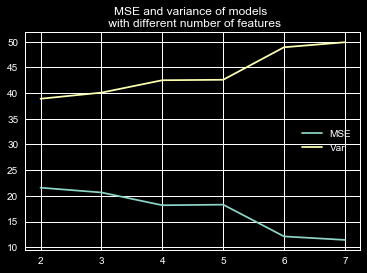

In [826]:
plt.plot(avg_df_2['feature'], avg_df_2['MSE'])
plt.plot(avg_df_2['feature'], avg_df_2['Var'])
plt.legend(loc="center right")
plt.title("MSE and variance of models \n with different number of features")
plt.show()

The 2 features model produces the lowest MSE and the 7 features model produces the lowest variance.

In [827]:
df_merged_1 = step_df.merge(avg_df_2, left_on='feature', right_on='feature', 
                            suffixes=('_in-sample', '_out_of_sample'))

df_merged_1 = df_merged_1.rename(columns={'variance':'Var_in_sample', 'Var':'Var_out_of_sample'})
df_merged_1["differenc MSE's"] = df_merged_1['MSE_in-sample'] - df_merged_1['MSE_out_of_sample']
df_merged_1['difference Var'] = df_merged_1['Var_in_sample'] - df_merged_1['Var_out_of_sample']

In [828]:
df_merged_1

,feature,MSE_in-sample,Var_in_sample,MSE_out_of_sample,Var_out_of_sample,differenc MSE's,difference Var
0,2,21.282057,39.480681,21.5844,38.9025,-0.302343,0.578181
1,3,20.252955,40.509784,20.6556,40.0913,-0.402645,0.418484
2,4,17.763861,42.998878,18.1697,42.5076,-0.405839,0.491278
3,5,17.761396,43.001342,18.2830,42.5987,-0.521604,0.402642
4,6,11.590171,49.172567,12.0997,48.9282,-0.509529,0.244367
5,7,10.847481,49.915257,11.4181,49.9043,-0.570619,0.010957


The difference in in-sample and out-sample results are relatively minor. The step-by-step models without cross-validation are not resulting in over-fitting.

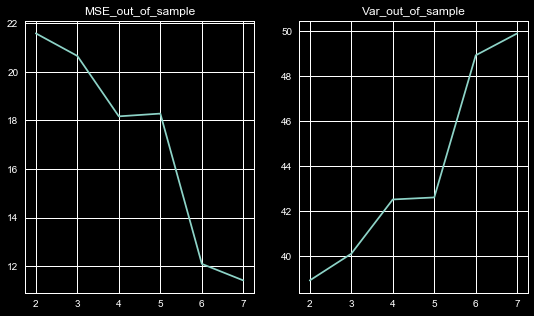

In [829]:
fig = plt.figure(figsize=(9,5))
fig.add_subplot(121)
plt.plot(df_merged_1['feature'], df_merged_1['MSE_out_of_sample'])
plt.title('MSE_out_of_sample')
fig.add_subplot(122)
plt.plot(df_merged_1['feature'], df_merged_1['Var_out_of_sample'])
plt.title('Var_out_of_sample')
plt.show()

The model performance increased with increased complexity or increased number of features. 
However the model predictability decreased with complexity. This is a step forward but can be improved with
hyperparameter tuning or different algorithms. Additionally a holdout data set can be used. 

<p>
<a fref="https://en.wikipedia.org/wiki/Training,_validation,_and_test_sets">Wikipedia: </a>Finally, the test dataset is a dataset used to provide an unbiased evaluation of a final model fit on 
the training dataset. If the data in the test dataset has never been used in training (for example in cross-validation), the test dataset is also called a holdout dataset. 
</p>